## Responsive Bar Graph

This is a project to demonstrate a bar graph that is responsive to input values. 

<IPython.core.display.Javascript object>


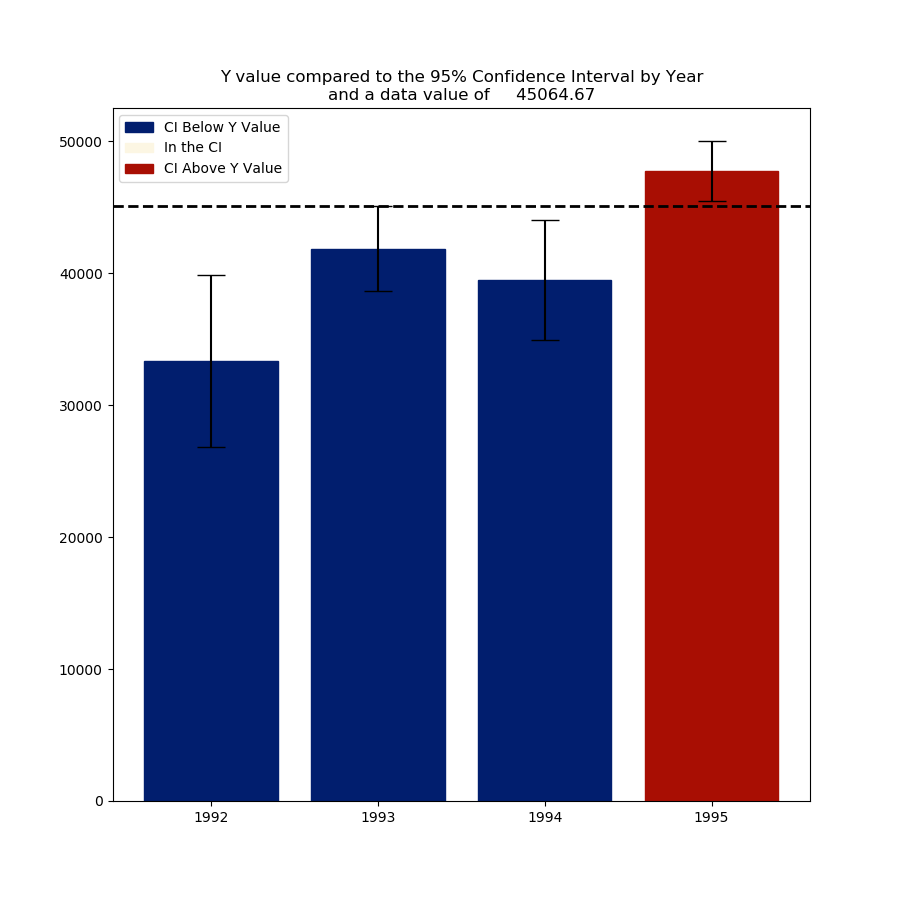

In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# build the DataFrame
np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

# create the figure
plt.figure(figsize=(9, 9))
plt.xticks(df.index)

#build the bar plots with 95% CI
yerr = (df.std(axis=1)/np.sqrt(len(df.columns))) * 1.96
bar_plot = plt.bar(df.index, df.mean(axis=1), yerr=yerr, edgecolor="black", capsize=10)
ax = plt.gca()

# draw the legend that specifies color value to relation of 95% CI    
below_CI = mpatches.Patch(label="CI Above Y Value", color='#a80e03')
inside_CI = mpatches.Patch(label="In the CI", color='#fcf6e3')
above_CI = mpatches.Patch(label="CI Below Y Value", color='#011e6e')

plt.legend(handles=[above_CI, inside_CI, below_CI])

# based on the y value selected color the bars with respect to their 95% confidence interval 
def adjust_graph_colors(y_value):
    lc = [i for i in bar_plot.errorbar.lines if i is not None]
    low_end = lc[0][0].get_ydata()
    high_end = lc[0][1].get_ydata()
 
    itr = 0
    
    for bar in bar_plot:
        le = low_end[itr]
        he = high_end[itr]

        if y_value < le:
            bar.set_color('#a80e03')
        elif y_value > he:
            bar.set_color('#011e6e')
        else:
            bar.set_color('#fcf6e3')
            bar.set_edgecolor('black')
        itr += 1

# remove the previous y value line and draw a new y value line to compare
def create_line(y_value):
    plt.axhline(y=y_value, color='k', linewidth=2, linestyle='dashed')
    plt.gca().set_title('Y value compared to the 95% Confidence Interval by Year\nand a data value of {:12.2f}'.format(y_value))
    adjust_graph_colors(y_value)

create_line(40000)

# event handler to repsond to the selection of a new point for the y value in question
def onclick(event):
    ax.lines[2].remove()
    create_line(event.ydata)
    plt.gcf().canvas.draw()

# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)
plt.savefig('Comparison_means.png')